In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

In [5]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

In [6]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [7]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [20]:
features, labels = list(train_dataset)[0]

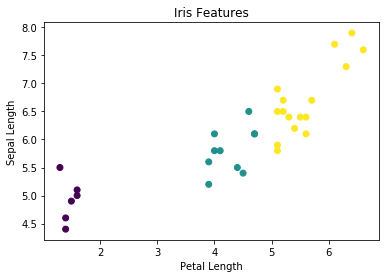

In [21]:
plt.scatter(features['petal_length'], 
            features['sepal_length'], 
            c=labels, cmap='viridis')
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.title("Iris Features")
plt.show()

In [22]:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [23]:
train_dataset = train_dataset.map(pack_features_vector)

In [24]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [25]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [26]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)

In [27]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [28]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [29]:
# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    # Track progress
    epoch_loss_avg(loss_value)
    epoch_accuracy(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

Epoch 000: Loss: 1.091, Accuracy: 37.500%
Epoch 050: Loss: 0.458, Accuracy: 70.000%
Epoch 100: Loss: 0.358, Accuracy: 91.667%
Epoch 150: Loss: 0.280, Accuracy: 92.500%
Epoch 200: Loss: 0.217, Accuracy: 95.000%


[<tf.Tensor: shape=(), dtype=float32, numpy=0.375>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.49166667>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.675>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7>,
 <tf.Tensor: shape=(), dtype=float32, n

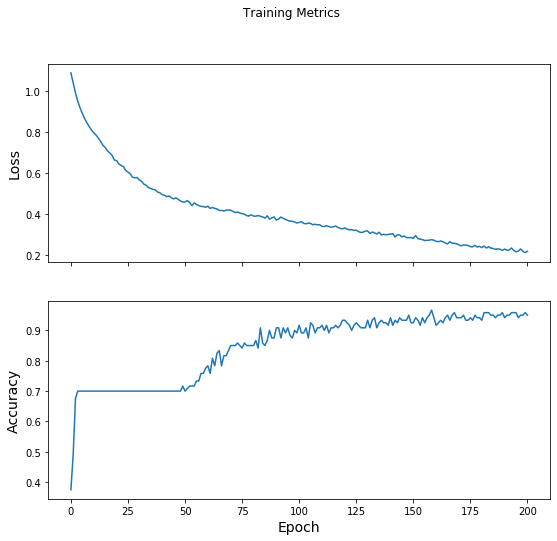

In [36]:
fig, axes = plt.subplots(2, sharex=True, figsize=(9, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()